In [30]:

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
# %config InlineBackend.figure_formats = ['svg']
import dut_a0 as a0

from misc import *

# dut.drv.serUSB = 'COM19'
drv = dut.drv

ser = serial.Serial('COM6', 9600, timeout=1)
dut.connect(ser)

In [ ]:
dut.reset_chip()
dut.reset_dpe()
dut.ground_PIC()
dut.power_on()

In [19]:
dut.disconnect()

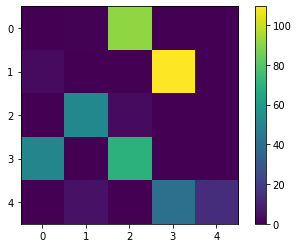

In [3]:
arr = 0
numRows = 5
numCols = 5
vRead = 0.2
vReadGate = 5.0
Vgate = 5.0
Gmap0 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            Gmap0[rr,cc] = 1e6*a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead

plt.imshow(Gmap0)
plt.colorbar()

In [3]:
plt.imshow(Gmap0, clim=[0, 200])
plt.colorbar()

NameError: name 'Gmap0' is not defined

In [1]:
%load_ext autoreload
%autoreload 2
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
%config InlineBackend.figure_formats = ['svg']

import matplotlib
matplotlib.rcParams['font.sans-serif'] = "Arial"

In [2]:
dpe = DPE('COM6')
dpe.set_clock(50)
dpe.shape

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


[64, 64]

....

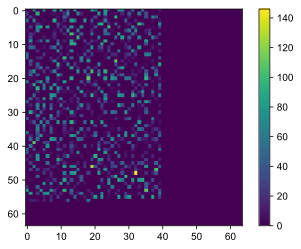

In [3]:
g = dpe.read(0, Tdly=1000, method='slow')
plt.imshow(g * 1e6)
plt.colorbar()

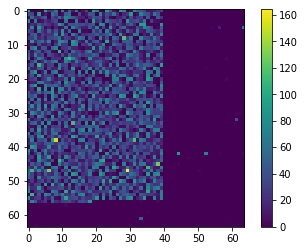

In [20]:
arr = 2
numRows = 64
numCols = 64
vRead = 0.2
vReadGate = 5.0
Vgate = 5.0
Gmap2 = np.zeros((numRows, numCols))
for rr in range(numRows):
        for cc in range(numCols):
            Gmap2[rr,cc] = 1e6*a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead

plt.imshow(Gmap2)
plt.colorbar()

(array([2.157e+03, 1.330e+02, 1.730e+02, 1.460e+02, 9.800e+01, 1.060e+02,
        1.480e+02, 1.310e+02, 1.110e+02, 1.240e+02, 1.090e+02, 7.500e+01,
        8.100e+01, 6.500e+01, 5.100e+01, 4.800e+01, 3.000e+01, 9.800e+01,
        6.800e+01, 1.800e+01, 3.400e+01, 1.000e+00, 5.900e+01, 9.000e+00,
        9.000e+00, 0.000e+00, 5.000e+00, 3.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([  0.        ,   4.10557185,   8.2111437 ,  12.31671554,
         16.42228739,  20.52785924,  24.63343109,  28.73900293,
         32.84457478,  36.95014663,  41.05571848,  45.16129032,
         49.26686217,  53.37243402,  57.47800587,  61.58357771,
         65.68914956,  69.79472141,  73.90029326,  78.0058651 ,
         82.11143695,  86.2170088 ,  90.32258065,  94.42815249,
         98.53372434, 102.63929619, 106.74486804, 110.85043988,
        114.95601173, 119.06158358, 123.16715543, 127.

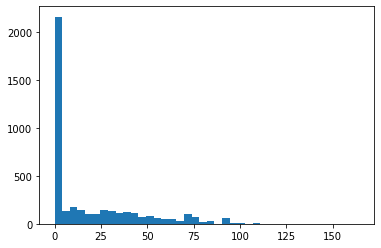

In [22]:
plt.hist(Gmap2.reshape(-1,1), bins=40)

In [5]:
plt.imshow(1e6*dpe.read(0), clim=[0, 200])
plt.colorbar()

NameError: name 'dpe' is not defined

Running <function DPE.read at 0x115BAAE0> with serial
[INFO] Elapsed time = 0.28s
Serial disconnected


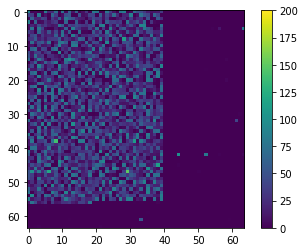

In [8]:
plt.imshow(1e6*dpe.read(2), clim=[0, 200])
plt.colorbar()

In [2]:
plt.imshow(1e6*dpe.read(1), clim=[0, 200])
plt.colorbar()

NameError: name 'dpe' is not defined

In [4]:
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
import matplotlib

#dpe = DPE('COM6')
#dpe.set_clock(50)

# Load the offline trained weights
# And the MNIST dataset
load_workspace(vars(), 'dataset/20190815-132601-weights')
load_workspace(vars(), 'dataset/mnist')

Loaded: weights, 
Loaded: train_images, train_labels, test_images, test_labels, 


In [6]:
# Load the target conductane for linear correction
import scipy.io as sio
mat_contents = sio.loadmat('UpdatedGconv.mat')
finalGconv = mat_contents['finalGconv']
nn = NN_dpe(weights)
dpe.N_BIT = 8

load_workspace(vars(), '20190821-051552-mnist_xs')

# load_workspace(vars(), 'mnist_xs_software')
xs = np.array(xs)
# Check xs 
acc = []

for img_idx in range(len(test_images)):
    x1 = xs[img_idx]
    y = nn.dense(x1)
    
    if (img_idx+1)%100 == 0:
        display.clear_output(wait=True)

        print(f'idx={img_idx}, predicted: {y.argmax()}, label: {test_labels[img_idx]}')
        acc.append( y.argmax() == test_labels[img_idx] )
        print(f'\t Accuracy = {np.mean(acc)*100:.2f}%')
        

idx=9999, predicted: 6, label: 6
	 Accuracy = 98.00%


In [7]:
print(np.shape(xs))

(10000, 112)


In [8]:
# Load the target conductane for linear correction
import scipy.io as sio
mat_contents = sio.loadmat('UpdatedGconv.mat')
finalGconv = mat_contents['finalGconv']
nn = NN_dpe(weights)
dpe.N_BIT = 8

load_workspace(vars(), '20190821-051552-mnist_xs')

# load_workspace(vars(), 'mnist_xs_software')
xs = np.array(xs)
np.shape(xs)

Loaded: In, Out, weights, train_images, train_labels, test_images, test_labels, g, img_idx, image, vectors, outputs, software, c, x, y, mat_contents, finalGconv, g1, g2, linear_factors_conv, xs, acc, result, x1, 


(10000, 112)

In [9]:
xs = np.concatenate((xs, np.ones((xs.shape[0], 1))), axis=1)

import scipy.io as sio
mat_contents = sio.loadmat('UpdatedGfc.mat')
finalGfc = mat_contents['finalGfc']

x = xs[0:400]

x1 = x[:,:57].T
x2 = x[:,57:].T

sc1 = x1.max()
sc2 = x2.max()

Gfc1 = finalGfc[:57]
Gfc2 = finalGfc[57:]

x1 = x1 / sc1
x2 = x2 / sc2

dpe.N_BIT = 8

output1 = dpe.multiply_w_delay(0, x1, c_sel=[0, 20], mode=0, delay=1, debug=False)
software1 = (Gfc1.T @ x1).T 

output2 = dpe.multiply_w_delay(0, x2, c_sel=[20, 40], mode=0, delay=1, debug=False)
software2 = (Gfc2.T @ x2).T

In [10]:
print(np.shape(Gfc1))
print(np.shape(x1))
print(np.shape(Gfc2))
print(np.shape(x2))
print(np.shape(x))
print(np.shape(xs))

(57, 20)
(57, 400)
(56, 20)
(56, 400)
(400, 113)
(10000, 113)


In [11]:
lin_cor_fc1 = []
lin_cor_fc2 = []
for c in range(20):
    lin_cor_fc1.append( np.polyfit(output1[:,c], software1[:,c], 1))
    lin_cor_fc2.append( np.polyfit(output2[:,c], software2[:,c], 1))

In [11]:
new_lin_cor_fc1 = []
new_lin_cor_fc2 = []
for c in range(20):
    new_lin_cor_fc1.append( np.polyfit(output1[:,c], software1[:,c], 1))
    new_lin_cor_fc2.append( np.polyfit(output2[:,c], software2[:,c], 1))

In [29]:
ll = vars()

In [39]:
save_workspace({'new_lin_cor_fc1': new_lin_cor_fc1, 'new_lin_cor_fc2': new_lin_cor_fc2}, note='Prober1_FCL_Array0')

Saving new_lin_cor_fc1(<class 'list'>), new_lin_cor_fc2(<class 'list'>), to 20191022-130305-Prober1_FCL_Array0.pkl
Saving new_lin_cor_fc1(<class 'list'>), new_lin_cor_fc2(<class 'list'>), to 20191022-130305-Prober1_FCL_Array0.mat


In [12]:
def lin_corr(outputs, factors):
    result = np.zeros(outputs.shape)
    for c in range(outputs.shape[1]):
        result[:,c] = outputs[:,c] * factors[c][0] + factors[c][1]
        
    return result

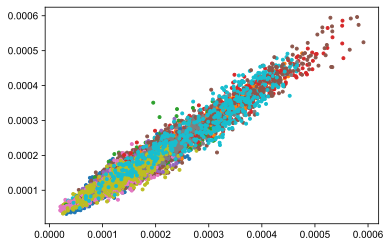

In [13]:
output_corr = dpe.lin_corr(output2, new_lin_cor_fc2)
software = (Gfc2.T @ x2).T 

for c in range(20):
    x = software[:,c]
    y = output_corr[:,c]
    
#     plt.figure(c)
    plt.plot(x,y,'.')

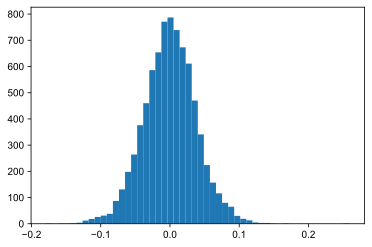

In [14]:
plt.hist((output_corr-software).flatten()/0.0006, bins=50 );

(array([  2.,   0.,   0.,   1.,   6.,   3.,   9.,   7.,   7.,   9.,  13.,
         20.,  34.,  38.,  56.,  91., 127., 156., 224., 263., 401., 407.,
        491., 568., 609., 612., 678., 600., 572., 422., 416., 371., 240.,
        186., 121.,  81.,  61.,  35.,  28.,  14.,   8.,   3.,   0.,   4.,
          3.,   1.,   0.,   0.,   1.,   1.]),
 array([-0.13084201, -0.12572464, -0.12060728, -0.11548991, -0.11037255,
        -0.10525518, -0.10013782, -0.09502045, -0.08990309, -0.08478572,
        -0.07966836, -0.07455099, -0.06943363, -0.06431627, -0.0591989 ,
        -0.05408154, -0.04896417, -0.04384681, -0.03872944, -0.03361208,
        -0.02849471, -0.02337735, -0.01825998, -0.01314262, -0.00802525,
        -0.00290789,  0.00220947,  0.00732684,  0.0124442 ,  0.01756157,
         0.02267893,  0.0277963 ,  0.03291366,  0.03803103,  0.04314839,
         0.04826576,  0.05338312,  0.05850049,  0.06361785,  0.06873521,
         0.07385258,  0.07896994,  0.08408731,  0.08920467,  0.09432204,
 

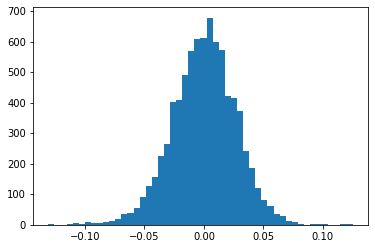

In [14]:
plt.hist((output_corr-software).flatten()/0.0006, bins=50 );

In [15]:
output_corr = lin_corr(output2, new_lin_cor_fc2)
software = (Gfc2.T @ x2).T 

for c in range(20):
    x = software[:,c]
    y = output_corr[:,c]
    
#     plt.figure(c)
    plt.plot(x,y,'.')

NameError: name 'lin_corr' is not defined

(array([  1.,   0.,   0.,   1.,   1.,   1.,   0.,   9.,   6.,   8.,  13.,
         18.,  25.,  31.,  62.,  82., 149., 195., 268., 405., 473., 561.,
        658., 724., 743., 779., 660., 534., 428., 392., 266., 184., 107.,
         79.,  52.,  46.,  14.,  13.,   6.,   2.,   0.,   1.,   1.,   0.,
          0.,   1.,   0.,   0.,   0.,   1.]),
 array([-0.14153227, -0.13571899, -0.12990571, -0.12409244, -0.11827916,
        -0.11246588, -0.1066526 , -0.10083933, -0.09502605, -0.08921277,
        -0.08339949, -0.07758621, -0.07177294, -0.06595966, -0.06014638,
        -0.0543331 , -0.04851983, -0.04270655, -0.03689327, -0.03107999,
        -0.02526672, -0.01945344, -0.01364016, -0.00782688, -0.00201361,
         0.00379967,  0.00961295,  0.01542623,  0.02123951,  0.02705278,
         0.03286606,  0.03867934,  0.04449262,  0.05030589,  0.05611917,
         0.06193245,  0.06774573,  0.073559  ,  0.07937228,  0.08518556,
         0.09099884,  0.09681211,  0.10262539,  0.10843867,  0.11425195,
 

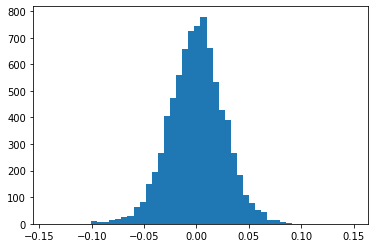

In [29]:
plt.hist((output_corr-software).reshape(-1, 1)/0.0006, bins=50 )

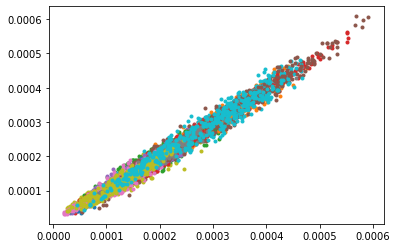

In [49]:
output_corr = lin_corr(output2, new_lin_cor_fc2)
software = (Gfc2.T @ x2).T 

for c in range(20):
    x = software[:,c]
    y = output_corr[:,c]
    
#     plt.figure(c)
    plt.plot(x,y,'.')


(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   3.,   2.,   6.,
          4.,  11.,  14.,  16.,  26.,  32.,  52.,  70., 119., 126., 162.,
        229., 361., 389., 444., 515., 618., 647., 633., 645., 557., 485.,
        408., 365., 351., 223., 176., 125.,  69.,  31.,  26.,  19.,  20.,
          7.,   2.,   2.,   4.,   0.,   3.]),
 array([-0.13691638, -0.1322225 , -0.12752861, -0.12283473, -0.11814084,
        -0.11344696, -0.10875307, -0.10405919, -0.0993653 , -0.09467142,
        -0.08997753, -0.08528365, -0.08058976, -0.07589588, -0.07120199,
        -0.06650811, -0.06181422, -0.05712034, -0.05242645, -0.04773257,
        -0.04303868, -0.0383448 , -0.03365091, -0.02895703, -0.02426314,
        -0.01956926, -0.01487537, -0.01018149, -0.0054876 , -0.00079372,
         0.00390017,  0.00859405,  0.01328794,  0.01798182,  0.02267571,
         0.02736959,  0.03206348,  0.03675737,  0.04145125,  0.04614514,
         0.05083902,  0.05553291,  0.06022679,  0.06492068,  0.06961456,
 

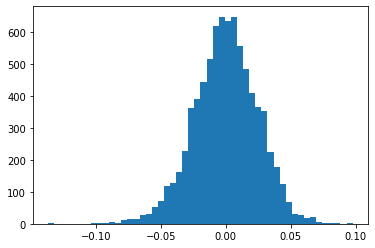

In [50]:
plt.hist((output_corr-software).reshape(-1, 1)/0.0006, bins=50 )

In [15]:
ys = []
batch_size = 100

for i in range( (len(test_images)-1)//batch_size + 1 ):
    idx1 = i * batch_size
    idx2 = (i+1) * batch_size
    idx2 = idx2 if idx2<= len(test_images) else len(test_images)
    
    print(f'Running on sample {idx1}-{idx2}')

    x = xs[idx1:idx2]

    x1 = x[:,:57].T
    x2 = x[:,57:].T

    sc1 = x1.max()
    sc2 = x2.max()

    Gfc1 = nn.Gfc[:57]
    Gfc2 = nn.Gfc[57:]

    x1 = x1 / sc1
    x2 = x2 / sc2
    
    output1  = dpe.multiply_w_delay(0, x1, c_sel=[0, 20], mode=1, debug=True, delay=1)
    output1 = lin_corr(output1, new_lin_cor_fc1) * sc1

    output2  = dpe.multiply_w_delay(0, x2, c_sel=[20, 40], mode=1, debug=True, delay=1)
    output2 = lin_corr(output2, new_lin_cor_fc2) * sc2

    outputs = output1 + output2
    
    y = outputs[:,::2] - outputs[:,1::2]
    
    display.clear_output(wait=True)
    
    print(f'Accuracy = {np.mean(y.argmax(axis=1) == test_labels[idx1:idx2])*100:.2f}%')
    ys.append(y)
    print(f'Total accuracy = {np.mean(np.concatenate(ys).argmax(axis=1) == test_labels[:idx2])*100:.2f}%')
    
ys = np.concatenate(ys)  

Accuracy = 85.00%
Total accuracy = 89.82%


In [69]:
np.shape(xs[0:100])

(100, 113)

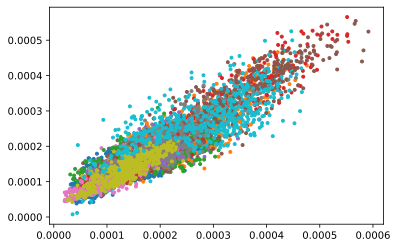

In [81]:
output_corr = lin_corr(output2, lin_cor_fc2)
software = (Gfc2.T @ x2).T 

for c in range(20):
    x = software[:,c]
    y = output_corr[:,c]
    
#     plt.figure(c)
    plt.plot(x,y,'.')


(array([  2.,   0.,   0.,   2.,   1.,   3.,   7.,   4.,   6.,  12.,  27.,
         31.,  43.,  43.,  92.,  94., 123., 162., 217., 262., 345., 427.,
        509., 555., 644., 665., 657., 635., 522., 488., 405., 298., 224.,
        157., 101.,  95.,  51.,  30.,  19.,   9.,   9.,   8.,   2.,   8.,
          1.,   1.,   2.,   0.,   1.,   1.]),
 array([-0.31231175, -0.30000915, -0.28770654, -0.27540394, -0.26310133,
        -0.25079873, -0.23849612, -0.22619352, -0.21389091, -0.20158831,
        -0.1892857 , -0.1769831 , -0.16468049, -0.15237789, -0.14007529,
        -0.12777268, -0.11547008, -0.10316747, -0.09086487, -0.07856226,
        -0.06625966, -0.05395705, -0.04165445, -0.02935184, -0.01704924,
        -0.00474663,  0.00755597,  0.01985858,  0.03216118,  0.04446379,
         0.05676639,  0.069069  ,  0.0813716 ,  0.09367421,  0.10597681,
         0.11827942,  0.13058202,  0.14288462,  0.15518723,  0.16748983,
         0.17979244,  0.19209504,  0.20439765,  0.21670025,  0.22900286,
 

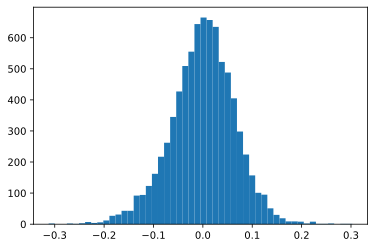

In [82]:
plt.hist((output_corr-software).reshape(-1, 1)/0.0006, bins=50 )

In [20]:
ys = []
batch_size = 100

for i in range( (len(test_images)-1)//batch_size + 1 ):
    idx1 = i * batch_size
    idx2 = (i+1) * batch_size
    idx2 = idx2 if idx2<= len(test_images) else len(test_images)
    
    print(f'Running on sample {idx1}-{idx2}')

    x = xs[idx1:idx2]

    x1 = x[:,:57].T
    x2 = x[:,57:].T

    sc1 = x1.max()
    sc2 = x2.max()

    Gfc1 = nn.Gfc[:57]
    Gfc2 = nn.Gfc[57:]

    x1 = x1 / sc1
    x2 = x2 / sc2
    
    output1  = dpe.multiply_w_delay(0, x1, c_sel=[0, 20], mode=1, debug=True, delay=1)
    output1 = lin_corr(output1, lin_cor_fc1) * sc1

    output2  = dpe.multiply_w_delay(0, x2, c_sel=[20, 40], mode=1, debug=True, delay=1)
    output2 = lin_corr(output2, lin_cor_fc2) * sc2

    outputs = output1 + output2
    
    y = outputs[:,::2] - outputs[:,1::2]
    
    display.clear_output(wait=True)
    
    print(f'Accuracy = {np.mean(y.argmax(axis=1) == test_labels[idx1:idx2])*100:.2f}%')
    ys.append(y)
    print(f'Total accuracy = {np.mean(np.concatenate(ys).argmax(axis=1) == test_labels[:idx2])*100:.2f}%')
    
ys = np.concatenate(ys)  

Accuracy = 86.00%
Total accuracy = 89.83%


In [84]:
np.mean(ys.argmax(axis=1) == test_labels)

0.4403

In [16]:
%reload_ext autoreload
%autoreload 2

import dut_func as dut
import serial
import time
import struct
import numpy as np
# from bitarray import bitarray
from bitstring import BitArray
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [17]:
from dpe import DPE
from lib_data import *
import matplotlib.pyplot as plt
import numpy as np
from lib_nn_dpe import NN_dpe
from IPython import display

import serial
import matplotlib

dpe = DPE('COM6')
dpe.set_clock(50)

DAC initialized to a span from -10 V to 10 V
Setting vrefs to default
Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


Load various data
--

In [18]:
# Load the offline trained weights
# And the MNIST dataset
load_workspace(vars(), 'dataset/20190815-132601-weights')
load_workspace(vars(), 'dataset/mnist')

# Load the target conductane for linear correction
import scipy.io as sio
mat_contents = sio.loadmat('UpdatedGconv.mat')
finalGconv = mat_contents['finalGconv']

Loaded: weights, 


MemoryError: 

Neural network model
--
Set the binarzation bits

In [21]:
nn = NN_dpe(weights)
dpe.N_BIT = 8

In [22]:
img_idx = 1

image = test_images[img_idx]
# image = test_images[1:40]
vectors = nn._conv_flattern(image)

# normalize
vectors /= np.abs(vectors).max()
output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
soft_output = (finalGconv.T @ vectors).T / (nn.Gratio/2)

In [23]:
img_idx = 1

#image = test_images[img_idx]
image = test_images[1:40]
vectors = nn._conv_flattern(image)

# normalize
vectors /= np.abs(vectors).max()
output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
soft_output = (finalGconv.T @ vectors).T / (nn.Gratio/2)

In [24]:
lin_cor_conv = []
for c in range(14):
    lin_cor_conv.append( np.polyfit(output[:,c], soft_output[:,c], 1))

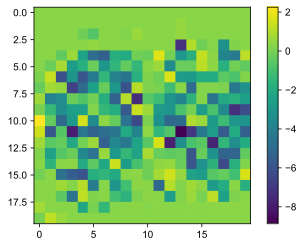

In [25]:
output_cor = dpe.lin_corr(output, lin_cor_conv)

# for c in range(14):
#     x = soft_output[:,c]
#     y = output_cor[:,c]
    
#     plt.plot(x,y,'.')
    
x = output_cor[:,::2] - output_cor[:,1::2]

x = x.reshape(20,20,-1)

plt.imshow(x[:,:,2])
plt.colorbar()

Software fully connected layer
--

In [26]:
x1 = nn.relu(x)
x1 = nn.max_pooling(x1)
x1 = nn.flattern(x1)
y = nn.dense(x1)

print(y)
print(y.argmax())

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4705 is different from 113)

Accuracy test (experimental convolution)
--


In [71]:
acc = []
i = 0

for label, img in zip(test_labels, test_images):
    
    vectors = nn._conv_flattern(img)
    
    # Convolution hardware call
    output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
    output_cor = dpe.lin_corr(output, lin_cor_conv)
    x = output_cor[:,::2] - output_cor[:,1::2]
    
    break

    x = x.reshape(20,20,-1)
    
    x1 = nn.relu(x)
    x1 = nn.max_pooling(x1)
    x1 = nn.flattern(x1)
    
    # Software fully connect
    y = nn.dense(x1)
    
    acc.append( y.argmax() == label)
    
    display.clear_output(wait=True)
    
    # Plot
    fig = plt.figure(1)
    for ii in range(7):
        plt.subplot('33' + str(ii+1))
        plt.title('Channel #' + str(ii))
        plt.imshow(x[:,:,ii])
#         plt.colorbar()
    plt.tight_layout()
    display.display(fig)
    
    
    print(f'idx={i}, predicted: {y.argmax()}, label: {test_labels[i]}')
    acc.append( y.argmax() == test_labels[i] )
    print(f'\t Accuracy = {np.mean(acc)*100:.2f}%')
    
    i += 1

Running <function DPE.multiply at 0x05434738> with serial
[INFO] Elapsed time = 1.51s
Serial disconnected


In [73]:
x = x.reshape(20,20,-1)
   
x1 = nn.relu(x)
x1 = nn.max_pooling(x1)
x1 = nn.flattern(x1)
np.shape(x1)

(112,)

In [74]:
y = nn.dense(x1)
np.shape(y)

(10,)

For hardware dense (fully connect) layer, refer to 'testbench_wk5_4_prober2_unary' notebook
--

In [58]:
np.shape(img)

(24, 24, 1)

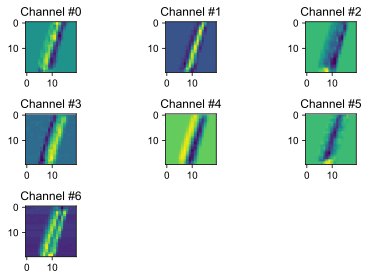

idx=2, predicted: 1, label: 1
	 Accuracy = 100.00%


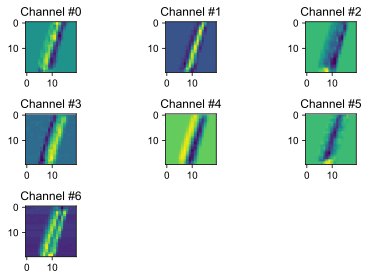

In [27]:
acc = []
i = 0

for label, img in zip(test_labels, test_images):
    
    vectors = nn._conv_flattern(img)
    
    # Convolution hardware call
    output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
    output_cor = dpe.lin_corr(output, lin_cor_conv)
    x = output_cor[:,::2] - output_cor[:,1::2]

    x = x.reshape(20,20,-1)
    convFilters = x
    
    x1 = nn.relu(x)
    x1 = nn.max_pooling(x1)
    x1 = nn.flattern(x1)
        
    # Software fully connect
    #y = nn.dense(x1)
    
    ## Start Hardware Fully Connect
    # print(np.shape(x1))    
    x = x1
    
    #x1 = x[:,:57].T
    #x2 = x[:,57:].T
    x1 = x[:57].T
    x2 = x[57:].T


    sc1 = x1.max()
    sc2 = x2.max()

    Gfc1 = nn.Gfc[:57]
    Gfc2 = nn.Gfc[57:]

    x1 = x1 / sc1
    x2 = x2 / sc2
    
    x1 = x1[x1 >= 0]
    x2 = x2[x2 >= 0]
    #print(np.shape(x1)) 
    #print(np.shape(x2)) 
    newX1 = x1.reshape(-1,1)
    newX2 = x2.reshape(-1,1)
    #break
    output1  = dpe.multiply_w_delay(0, newX1, c_sel=[0, 20], mode=1, debug=False, delay=1)
    output1 = dpe.lin_corr(output1, new_lin_cor_fc1) * sc1

    output2  = dpe.multiply_w_delay(0, newX2, c_sel=[20, 40], mode=1, debug=False, delay=1)
    output2 = dpe.lin_corr(output2, new_lin_cor_fc2) * sc2

    outputs = output1 + output2
    
    y = outputs[:,::2] - outputs[:,1::2]
    
    ## End Hardware Fully Connect
    
    acc.append( y.argmax() == label)
    
    display.clear_output(wait=True)
    
    # Plot
    fig = plt.figure(1)
    for ii in range(7):
        plt.subplot('33' + str(ii+1))
        plt.title('Channel #' + str(ii))
        plt.imshow(convFilters[:,:,ii])
#         plt.colorbar()
    plt.tight_layout()
    display.display(fig)
    
    print(f'idx={i}, predicted: {y.argmax()}, label: {test_labels[i]}')
    acc.append( y.argmax() == test_labels[i] )
    print(f'\t Accuracy = {np.mean(acc)*100:.2f}%')
    
    i += 1
    if (i >= 3):
        break
        

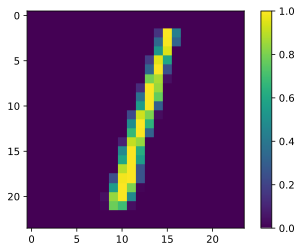

In [94]:
#np.shape(img[:,:,0])
plt.imshow(img[:,:,0])
plt.colorbar()

In [16]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from PIL import Image 

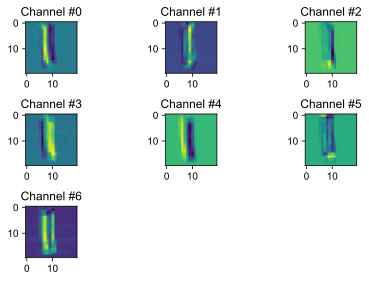

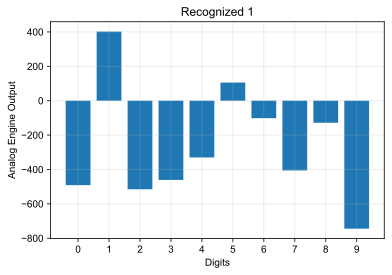

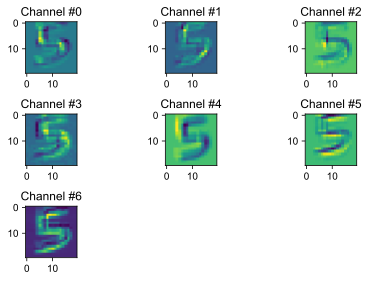

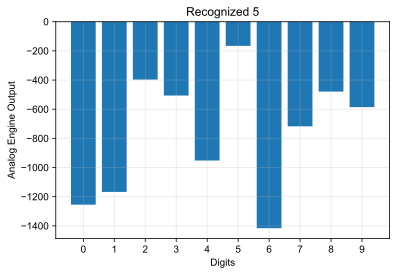

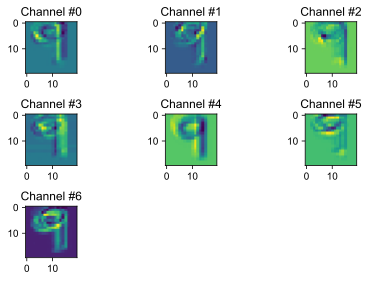

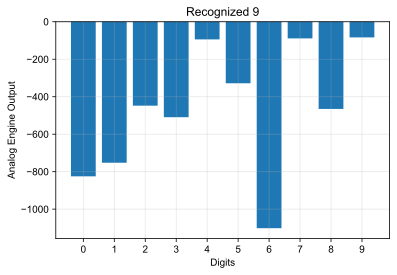

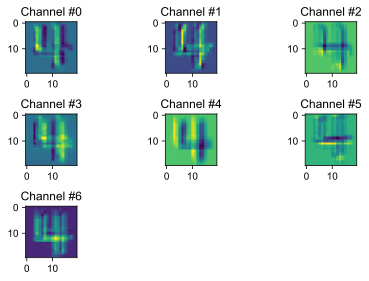

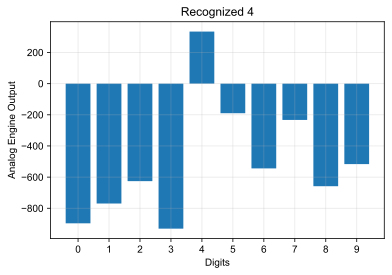

KeyboardInterrupt: 

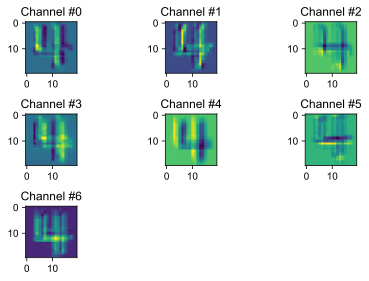

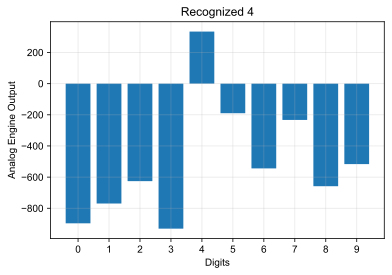

In [29]:
width = 200
height = 200
center = height//2
white = (255, 255, 255)
green = (0,128,0)

def classify():
    filename = "image.png"
    image1.save(filename)
    img = Image.open(filename)
    #userImage = np.array( img, dtype='uint8' )
    smallImg = Image.open(filename).resize((24,24), Image.ANTIALIAS)
    #userImage = np.array(Image.open(filename).convert('L'))
    userImage = np.array(smallImg.convert('L'))
    mxPixel = np.max(userImage)
    mnPixel = np.min(userImage)
    userImage = 1-((userImage-mnPixel)/(mxPixel-mnPixel))
    newImage = np.zeros((24,24,1))
    newImage[:,:,0] = userImage
    
    #NOW PERFORM THE MNIST CLASSIFICATION
    vectors = nn._conv_flattern(newImage)
    
    # Convolution hardware call
    output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
    output_cor = dpe.lin_corr(output, lin_cor_conv)
    x = output_cor[:,::2] - output_cor[:,1::2]
    x = x.reshape(20,20,-1)
    convFilters = x    
    x1 = nn.relu(x)
    x1 = nn.max_pooling(x1)
    x1 = nn.flattern(x1)        
    ## Start Hardware Fully Connect
    # print(np.shape(x1))    
    x = x1    
    x1 = x[:57].T
    x2 = x[57:].T
    sc1 = x1.max()
    sc2 = x2.max()
    Gfc1 = nn.Gfc[:57]
    Gfc2 = nn.Gfc[57:]
    x1 = x1 / sc1
    x2 = x2 / sc2
    
    x1 = x1[x1 >= 0]
    x2 = x2[x2 >= 0]    
    newX1 = x1.reshape(-1,1)
    newX2 = x2.reshape(-1,1)
    #break
    output1  = dpe.multiply_w_delay(0, newX1, c_sel=[0, 20], mode=1, debug=False, delay=1)
    output1 = dpe.lin_corr(output1, new_lin_cor_fc1) * sc1

    output2  = dpe.multiply_w_delay(0, newX2, c_sel=[20, 40], mode=1, debug=False, delay=1)
    output2 = dpe.lin_corr(output2, new_lin_cor_fc2) * sc2
    outputs = output1 + output2    
    y = outputs[:,::2] - outputs[:,1::2]    
    ## End Hardware Fully Connect

    #display.clear_output(wait=True)
    classificationResult = y.argmax()
    #END CLASSIFICATION
  
    cv.create_text(5, 190, anchor=W, font="Purisa",
            text="You drew: "+str(classificationResult))
   
    # Plot
    fig = plt.figure()
    for ii in range(7):
        plt.subplot('33' + str(ii+1))
        plt.title('Channel #' + str(ii))
        plt.imshow(convFilters[:,:,ii])
    plt.tight_layout()
    display.display(fig)

    fig2 = plt.figure()
    plt.bar(np.arange(10), y[0] * 1e6)
    plt.grid(True, alpha=.3)
    plt.title(f'Recognized {y.argmax()}')
    plt.xticks(np.arange(10))
    plt.xlabel('Digits')
    plt.ylabel('Analog Engine Output') 
    display.display(fig2)
    
    
def clearAll():
    draw.rectangle([0, 0, width, height], fill='white')
    cv.delete("all")
    
def paint(event):
    # python_green = "#476042"
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=7)
    draw.line([x1, y1, x2, y2],fill="black",width=7)

root = Tk()

# Tkinter create a canvas to draw on
cv = Canvas(root, width=width, height=height, bg='white')
cv.pack()

image1 = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(image1)

cv.pack(expand=YES, fill=BOTH)
cv.bind("<B1-Motion>", paint)

button=Button(text="Classify with Analog Engine",command=classify)
button.pack()
button2=Button(text="Clear",command=clearAll)
button2.pack()
root.mainloop()

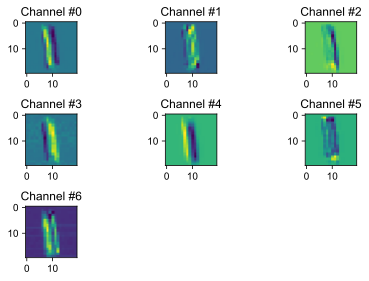

c:\users\localuser\~\.venvs\py37\lib\site-packages\ipykernel_launcher.py:79: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


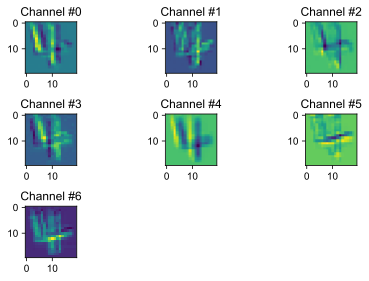

In [28]:
lin_cor_fc1 = new_lin_cor_fc1
lin_cor_fc2 = new_lin_cor_fc2
width = 200
height = 200
center = height//2
white = (255, 255, 255)
green = (0,128,0)

def classify():
    filename = "image.png"
    image1.save(filename)
    img = Image.open(filename)
    #userImage = np.array( img, dtype='uint8' )
    smallImg = Image.open(filename).resize((24,24), Image.ANTIALIAS)
    #userImage = np.array(Image.open(filename).convert('L'))
    userImage = np.array(smallImg.convert('L'))
    mxPixel = np.max(userImage)
    mnPixel = np.min(userImage)
    userImage = 1-((userImage-mnPixel)/(mxPixel-mnPixel))
    newImage = np.zeros((24,24,1))
    newImage[:,:,0] = userImage
    
    #NOW PERFORM THE MNIST CLASSIFICATION
    vectors = nn._conv_flattern(newImage)
    
    # Convolution hardware call
    output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
    output_cor = dpe.lin_corr(output, lin_cor_conv)
    x = output_cor[:,::2] - output_cor[:,1::2]
    x = x.reshape(20,20,-1)
    convFilters = x    
    x1 = nn.relu(x)
    x1 = nn.max_pooling(x1)
    x1 = nn.flattern(x1)        
    ## Start Hardware Fully Connect
    # print(np.shape(x1))    
    x = x1    
    x1 = x[:57].T
    x2 = x[57:].T
    sc1 = x1.max()
    sc2 = x2.max()
    Gfc1 = nn.Gfc[:57]
    Gfc2 = nn.Gfc[57:]
    x1 = x1 / sc1
    x2 = x2 / sc2
    
    x1 = x1[x1 >= 0]
    x2 = x2[x2 >= 0]
    #print(np.shape(x1)) 
    #print(np.shape(x2)) 
    newX1 = x1.reshape(-1,1)
    newX2 = x2.reshape(-1,1)
    #break
    output1  = dpe.multiply_w_delay(0, newX1, c_sel=[0, 20], mode=1, debug=False, delay=1)
    output1 = dpe.lin_corr(output1, new_lin_cor_fc1) * sc1

    output2  = dpe.multiply_w_delay(0, newX2, c_sel=[20, 40], mode=1, debug=False, delay=1)
    output2 = dpe.lin_corr(output2, new_lin_cor_fc2) * sc2
    outputs = output1 + output2    
    y = outputs[:,::2] - outputs[:,1::2]    
    ## End Hardware Fully Connect

    #display.clear_output(wait=True)
    classificationResult = y.argmax()
    #END CLASSIFICATION
  
    cv.create_text(5, 190, anchor=W, font="Purisa",
            text="You drew: "+str(classificationResult))
    
    #fig = plt.figure(num=3, clear=True)
    #fig.clf()
    fig = plt.figure(3)
    #plt.figure(figgy)
    #fig, ax=plt.subplots(8,1,num=8, clear=True)
    for ii in range(7):
        #ax.subplot('81' + str(ii+1))
        #axes[ii,0].title('Channel #' + str(ii))
        #ax.imshow(convFilters[:,:,ii])
        plt.subplot('33' + str(ii+1))
        plt.title('Channel #' + str(ii))
        plt.imshow(convFilters[:,:,ii])
    plt.tight_layout()
    display.display(fig)
    #plt.subplot('818')
    #plt.plot(y, '.-')
    
    # Plot
    #fig = plt.figure(1)
    #for ii in range(7):
    #    plt.subplot('33' + str(ii+1))
    #    plt.title('Channel #' + str(ii))
    #    plt.imshow(convFilters[:,:,ii])
    #plt.tight_layout()
    #display.display(fig)
    
    
def clearAll():
    draw.rectangle([0, 0, width, height], fill='white')
    cv.delete("all")
    
def paint(event):
    # python_green = "#476042"
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    cv.create_oval(x1, y1, x2, y2, fill="black",width=7)
    draw.line([x1, y1, x2, y2],fill="black",width=7)

root = Tk()

#figgy = plt.figure()
#ax = plt.subplots(331)
#fig, axes = plt.subplots(8, 1)

# Tkinter create a canvas to draw on
cv = Canvas(root, width=width, height=height, bg='white')
cv.pack()

# PIL create an empty image and draw object to draw on memory only, not visible
image1 = PIL.Image.new("RGB", (width, height), white)
draw = ImageDraw.Draw(image1)

# cv.create_line([0, center, width, center], fill='green')
cv.pack(expand=YES, fill=BOTH)
cv.bind("<B1-Motion>", paint)

button=Button(text="Classify with Analog Engine",command=classify)
button.pack()
button2=Button(text="Clear",command=clearAll)
button2.pack()

#figure1, ax1 = plt.figure(figsize=(5,4), dpi=100)
#figure1,ax1 = plt.figure(1)
#ax1 = figure1.add_subplot(111)
#line1 = FigureCanvasTkAgg(figure1, root)
#line1.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH)
#ax1.plot(np.linspace(0,5,5), np.linspace(0,10,5), '-.')
#ax1.set_title('Year1 Vs. 1Unemployment Rate')

#figure2, ax2 = plt.figure(figsize=(5,4), dpi=100)
#ax2 = figure2.add_subplot(111)
#line2 = FigureCanvasTkAgg(figure2, root)
#line2.get_tk_widget().pack(side=tk.BOTTOM, fill=tk.BOTH)
#ax2.plot(np.linspace(0,10,5), np.linspace(0,20,5), '-.')
#ax2.set_title('Year Vs. Unemployment Rate')

root.mainloop()

In [88]:
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from matplotlib.figure import Figure
from tkinter import *

class mclass:
    def __init__(self,  window):
        self.window = window
        self.box = Entry(window)
        self.button = Button (window, text="check", command=self.plot)
        self.box.pack ()
        self.button.pack()

    def plot (self):
        x=np.array ([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
        v= np.array ([16,16.31925,17.6394,16.003,17.2861,17.3131,19.1259,18.9694,22.0003,22.81226])
        p= np.array ([16.23697,     17.31653,     17.22094,     17.68631,     17.73641 ,    18.6368,
            19.32125,     19.31756 ,    21.20247  ,   22.41444   ,  22.11718  ,   22.12453])

        fig = Figure(figsize=(6,6))
        a = fig.add_subplot(111)
        a.scatter(v,x,color='red')
        a.plot(p, range(2 +max(x)),color='blue')
        a.invert_yaxis()

        a.set_title ("Estimation Grid", fontsize=16)
        a.set_ylabel("Y", fontsize=14)
        a.set_xlabel("X", fontsize=14)

        canvas = FigureCanvasTkAgg(fig, master=self.window)
        canvas.get_tk_widget().pack()
        canvas.draw()

window= Tk()
start= mclass (window)
window.mainloop()

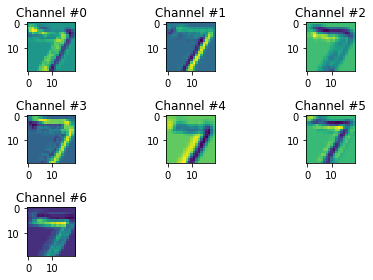

idx=0, predicted: 7, label: 7
	 Accuracy = 100.00%


IndexError: too many indices for array

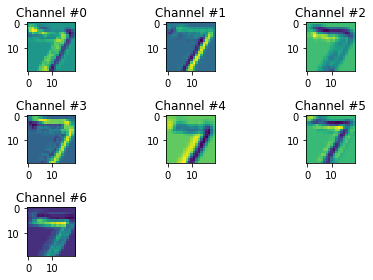

In [107]:
# Conv layer

acc = []
ys = []
i = 0

for label, img in zip(test_labels, test_images):
    
    vectors = nn._conv_flattern(img)
    
    # Convolution hardware call
    output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
    output_cor = dpe.lin_corr(output, lin_cor_conv)
    x = output_cor[:,::2] - output_cor[:,1::2]

    x = x.reshape(20,20,-1)
    
    x1 = nn.relu(x)
    x1 = nn.max_pooling(x1)
    x1 = nn.flattern(x1)
    
    # Software fully connect
    y = nn.dense(x1)
    
    acc.append( y.argmax() == label)
    
    display.clear_output(wait=True)
    
    # Plot
    fig = plt.figure(1)
    for ii in range(7):
        plt.subplot('33' + str(ii+1))
        plt.title('Channel #' + str(ii))
        plt.imshow(x[:,:,ii])
#         plt.colorbar()
    plt.tight_layout()
    display.display(fig)
    
    
    print(f'idx={i}, predicted: {y.argmax()}, label: {test_labels[i]}')
    acc.append( y.argmax() == test_labels[i] )
    print(f'\t Accuracy = {np.mean(acc)*100:.2f}%')
    
    i += 1
    
# Now Fully connect layer


    #x = xs[idx1:idx2]
    
    x = x1

    x1 = x[:,:57].T
    x2 = x[:,57:].T

    sc1 = x1.max()
    sc2 = x2.max()

    Gfc1 = nn.Gfc[:57]
    Gfc2 = nn.Gfc[57:]

    x1 = x1 / sc1
    x2 = x2 / sc2
    
    output1  = dpe.multiply_w_delay(0, x1, c_sel=[0, 20], mode=1, debug=True, delay=1)
    output1 = lin_corr(output1, new_lin_cor_fc1) * sc1

    output2  = dpe.multiply_w_delay(0, x2, c_sel=[20, 40], mode=1, debug=True, delay=1)
    output2 = lin_corr(output2, new_lin_cor_fc2) * sc2

    outputs = output1 + output2
    
    y = outputs[:,::2] - outputs[:,1::2]
    
    display.clear_output(wait=True)
    
    print(f'Accuracy = {np.mean(y.argmax(axis=1) == test_labels[idx1:idx2])*100:.2f}%')
    ys.append(y)
    print(f'Total accuracy = {np.mean(np.concatenate(ys).argmax(axis=1) == test_labels[:idx2])*100:.2f}%')
    
ys = np.concatenate(ys)  


In [71]:
print(x1)

[ 0.44744533 -0.          0.69197584  0.22484904  0.72838911  0.44308536
 -0.          0.30001803  0.11447361  0.17104769  0.44708377 -0.
  0.00344969  0.10825866  0.00568435 -0.          0.16957385  0.24668354
 -0.          0.00344969 -0.         -0.          0.24282806  0.17832228
  0.35036212 -0.          0.00344969 -0.         -0.         -0.
  1.         -0.          0.52161202  0.35912055  0.56895783 -0.
 -0.          0.81572436 -0.         -0.          0.5958832   0.71777487
  0.21851262 -0.          0.70677194  0.10550366  0.87666976  0.88665837
  0.94850374  0.09225845  0.76452122  0.16179573  0.3595715  -0.
  0.25032078  0.95239028 -0.        ]


In [34]:
acc = []
i = 0

for label, img in zip(test_labels, test_images):
    
    vectors = nn._conv_flattern(img)
    
    # Convolution hardware call
    output = dpe.multiply(1, vectors, c_sel=[0, 14], mode=0) / (nn.Gratio/2)
    output_cor = dpe.lin_corr(output, lin_cor_conv)
    x = output_cor[:,::2] - output_cor[:,1::2]

    print('Initial Size of X is', np.shape(x))
    x = x.reshape(20,20,-1)
    
    x1 = nn.relu(x)
    x1 = nn.max_pooling(x1)
    x1 = nn.flattern(x1)
    
    print('Final Size of X1 is', np.shape(x1))
    # Software fully connect
    y = nn.dense(x1)
        
    acc.append( y.argmax() == label)
    
    display.clear_output(wait=True)
    
    # Plot
#    fig = plt.figure(1)
    #for ii in range(7):
    #    plt.subplot('33' + str(ii+1))
    #    plt.title('Channel #' + str(ii))
    #    plt.imshow(x[:,:,ii])
##         plt.colorbar()
#    plt.tight_layout()
#    display.display(fig)
    
    
    #print(f'idx={i}, predicted: {y.argmax()}, label: {test_labels[i]}')
    acc.append( y.argmax() == test_labels[i] )
    #print(f'\t Accuracy = {np.mean(acc)*100:.2f}%')
    
    i += 1
    if (i >= 3):
        break
        

Running <function DPE.multiply at 0x108FCE40> with serial
[INFO] Elapsed time = 1.74s
Serial disconnected
Initial Size of X is (400, 7)
Final Size of X1 is (112,)


In [45]:
np.shape(x1)

(112,)

In [72]:
aa = np.random.randint(2, size=(1,57))
#print(aa)
output1  = dpe.multiply_w_delay(0, aa, c_sel=[0, 20], mode=1, debug=True, delay=1)

Running <function DPE.multiply_w_delay at 0x108FCED0> with serial
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[DEBUG] processing vector 0
[DEBUG] processing vector 50
[INFO] Elapsed time = 0.79s
Serial disconnected


In [73]:
print(output1)
print(np.shape(output1))

[[1.16324536e-06 0.00000000e+00 7.28739003e-05 ... 0.00000000e+00
  0.00000000e+00 8.55327468e-05]
 [1.17607527e-06 0.00000000e+00 7.30449658e-05 ... 0.00000000e+00
  0.00000000e+00 8.57038123e-05]
 [1.17607527e-06 0.00000000e+00 7.31304985e-05 ... 0.00000000e+00
  0.00000000e+00 8.60459433e-05]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.18035191e-06 0.00000000e+00 7.24890029e-05 ... 0.00000000e+00
  0.00000000e+00 8.61314761e-05]]
(57, 20)


In [23]:
from lib_data import *
import scipy.io as sio

mat_contents = sio.loadmat('UpdatedGfc.mat')
finalGfc = mat_contents['finalGfc']

mat_contents = sio.loadmat('Prober1TargetDevices.mat')
targetRowsPython = mat_contents['targetRowsPython']
targetColsPython = mat_contents['targetColsPython']
actualRows = targetRowsPython[0]
actualCols = targetColsPython[0]
totalDevices = np.size(actualRows)

GMin = 1e-6
# First reshape Gfc to fit within the 64 rows
# reshape from 113x20 to 57x40
newGfc = np.zeros((57,40))+GMin
newGfc[0:57,0:20]=finalGfc[0:57,0:20]
newGfc[0:56,20:40]=finalGfc[57:113,0:20]

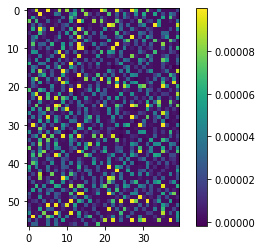

In [24]:
plt.imshow(newGfc)
plt.colorbar()

In [36]:
newGfc[5,5]

1.9999999949504854e-06

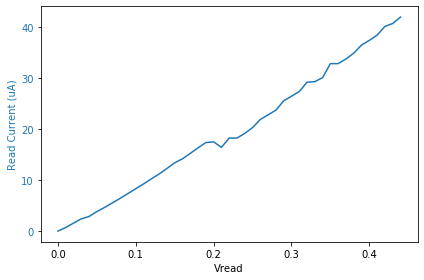

In [11]:
arr=0
rr=0
cc=2

Vreads = np.arange(0, 0.45, 0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
    
for vRead in Vreads:
    rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1))

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('Read Current (uA)', color=color)
ax1.plot(Vreads, [i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

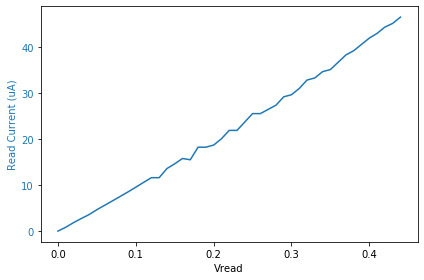

In [15]:
arr=0
rr=0
cc=2

Vreads = np.arange(0, 0.45, 0.01)
Vgate = 5
Vref = 0.5
rdCurrs = []
    
for vRead in Vreads:
    #rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1))
    rdCurrs.append(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1))

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Vread')
ax1.set_ylabel('Read Current (uA)', color=color)
ax1.plot(Vreads, [i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

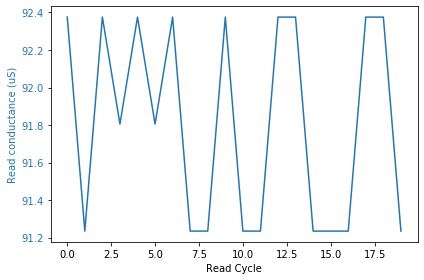

In [16]:
arr=0
rr=0
cc=2
Vgate = 5
Vref = 0.5
rdCurrs = []
numReads = 20
vRead = 0.2

for i in range(numReads):
    #rdCurrs.append(a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead)
    rdCurrs.append(a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead)
    time.sleep(0.2)

fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('Read Cycle')
ax1.set_ylabel('Read conductance (uS)', color=color)
ax1.plot([i* 1e6 for i in rdCurrs], color=color)
ax1.tick_params(axis='y', labelcolor=color)
fig.tight_layout()  
plt.show()

In [14]:
arr = 0
rr = 0
cc = 2

Vgate = 5

targetG = 100e-6
targetTolerance = 5e-6

vSetRamp = np.arange(0.4, 3.5, 0.2)
vGateSetRamp = np.arange(0.6, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.8, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 4

#initG = a0.pic_read_single(arr, rr, cc, Vread=vRead, Vgate=Vgate, gain=-1) / vRead
initG = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead
finalG = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
if ( (finalG >= (targetG-targetTolerance)) & (finalG <= (targetG+targetTolerance)) ):
    print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))
else:
    print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG, ' Final G=', finalG, 'Err=', (finalG-targetG))

Success! Array 0 , device (row= 0 col= 2 ) Init G= 8.74714890843923e-05  Final G= 9.579667644183771e-05 Err= -4.203323558162292e-06


In [37]:
from lib_data import *
import scipy.io as sio
mat_contents = sio.loadmat('UpdatedGfc.mat')
finalGfc = mat_contents['finalGfc']
# First reshape Gfc to fit within the 64 rows
# reshape from 113x20 to 57x40
newGfc = np.zeros((57,40))
newGfc[0:57,0:20]=finalGfc[0:57,0:20]
newGfc[0:56,20:40]=finalGfc[57:113,0:20]

arr = 0
numRows = 57
numCols = 40
Vgate = 5
targetTolerance = 4e-6

vSetRamp = np.arange(0.3, 3.5, 0.2)
vGateSetRamp = np.arange(0.5, 1.4, 0.05)
vResetRamp = np.arange(0.3, 3.8, 0.1)
vGateResetRamp = np.arange(5.0, 5.5, 0.5)
maxLoops = 5
initG = np.zeros((numRows,numCols))
finalG = np.zeros((numRows,numCols))
for rr in range(numRows):
    for cc in range(numCols):
        targetG = newGfc[rr,cc]
        initG[rr,cc] = a0.read_single_int(vRead, Vgate, array=arr, row=rr, col=cc, gain=-1) / vRead
        finalG[rr,cc] = a0.cell_program(arr, rr, cc, targetG, targetTolerance, vSetRamp, vResetRamp, vGateSetRamp, vGateResetRamp, maxLoops=maxLoops)
        if ( (finalG[rr,cc] >= (targetG-targetTolerance)) & (finalG[rr,cc] <= (targetG+targetTolerance)) ):
            print('Success! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[rr,cc], ' Final G=', finalG[rr,cc], 'Err=', (finalG[rr,cc]-targetG))
        else:
            print('Fail! Array', arr, ', device (row=', rr, 'col=', cc, ') Init G=', initG[rr,cc], ' Final G=', finalG[rr,cc], 'Err=', (finalG[rr,cc]-targetG))

Success! Array 0 , device (row= 0 col= 0 ) Init G= 0.0  Final G= 0.0 Err= -1.9999999949504854e-06
Success! Array 0 , device (row= 0 col= 1 ) Init G= 5.474095796676442e-07  Final G= 7.458455522971652e-06 Err= -3.305317866072566e-06
Success! Array 0 , device (row= 0 col= 2 ) Init G= 9.180514825676115e-05  Final G= 9.351580319322253e-05 Err= 1.223962491858551e-06
Success! Array 0 , device (row= 0 col= 3 ) Init G= 0.0  Final G= 0.0 Err= -1.9999999949504854e-06
Success! Array 0 , device (row= 0 col= 4 ) Init G= 0.0  Final G= 0.0 Err= -1.9999999949504854e-06
Success! Array 0 , device (row= 0 col= 5 ) Init G= 6.560361681329422e-05  Final G= 9.579667644183771e-05 Err= -2.8266079879397005e-06
Success! Array 0 , device (row= 0 col= 6 ) Init G= 0.0  Final G= 0.0 Err= -1.9999999949504854e-06
Success! Array 0 , device (row= 0 col= 7 ) Init G= 0.0  Final G= 3.010752688172042e-06 Err= -3.9241976182865895e-06
Success! Array 0 , device (row= 0 col= 8 ) Init G= 7.754969045291626e-05  Final G= 8.21114369

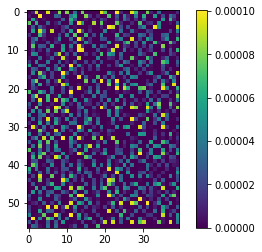

In [38]:
plt.imshow(finalG)
plt.colorbar()

([array([32.,  1.,  0.,  2.,  0.,  3.,  2.,  1.,  2.,  1.,  1.,  0.,  3.,
          0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  0.,
          0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([26.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  2.,
          3.,  1.,  2.,  3.,  1.,  1.,  0.,  0.,  2.,  1.,  0.,  2.,  0.,
          0.,  2.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
  array([35.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,
          1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  2.,  1.,  1.,  1.,
          0.,  0.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,
          0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.]),
  array([20.,  2.,  2.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          2.,  1.,  3.,  1.,  3.,  1.,  0.,  0.,  2.,  1.,  1.

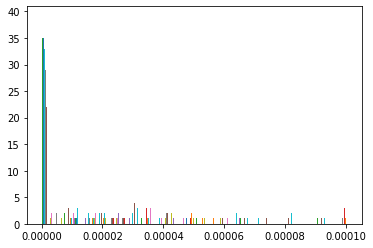

In [40]:
plt.hist(finalG, bins=50)

([array([ 0., 32.,  0.,  1.,  2.,  1.,  0.,  5.,  1.,  0.,  2.,  0.,  0.,
          2.,  2.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  0.,
          0.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
  array([ 0., 26.,  0.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,  1.,  0.,  2.,
          2.,  2.,  1.,  2.,  3.,  2.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,
          3.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
  array([ 0., 35.,  0.,  1.,  0.,  1.,  2.,  0.,  1.,  0.,  1.,  1.,  1.,
          1.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  3.,  2.,
          0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  2.,  0.,  0.,  0.]),
  array([ 0., 22.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
          2.,  1.,  1.,  2.,  1.,  2.,  0.,  1.,  1.,  1.,  2.

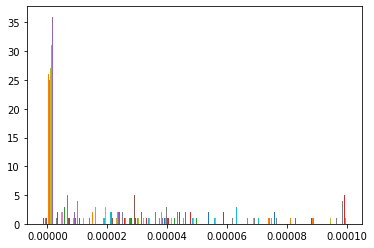

In [41]:
plt.hist(newGfc, bins=50)

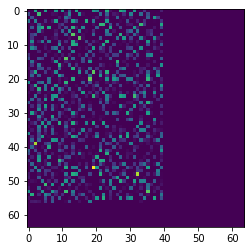

In [7]:
plt.imshow(dpe.read(0))

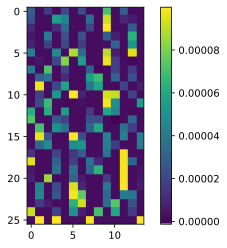

In [38]:
plt.imshow(finalGconv); plt.colorbar()

In [46]:
dpe.set_clock(50)

Setting ADC_CK freq=50000.0kHz
Setting CK_ARRAY freq=50000.0kHz


.....

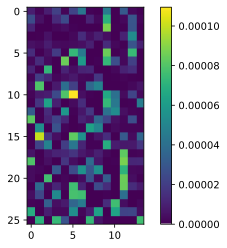

In [57]:
g = dpe.read(1, method='slow', Tdly=1000)
plt.imshow(g[:26,:14]); plt.colorbar()

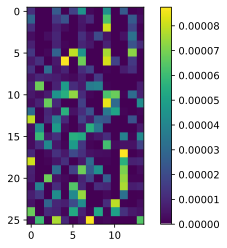

In [62]:
g = dpe.read(1, method='fast', Tdly=0)
plt.imshow(g[:26,:14]); plt.colorbar()